<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Требуется обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Импортируем библиотеки

In [1]:
# установим последнюю версию scikit-learn
!pip install scikit-learn==1.1.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import inv


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from sklearn.linear_model import LinearRegression 


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

In [3]:
# игнорирование предупреждений
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

## Загрузка данных

**Считаем данные из csv-файлов в датафрейм и сохраним в переменные data.**

Данные находятся в файле:

- insurance.csv 

Путь к файлу:

- /datasets/insurance.csv 


In [4]:
data = pd.read_csv('/datasets/insurance.csv')

**Функция по выводу основной информации по датафреймам**

In [5]:
def all_info(data):

    
    print('\033[1m'+'1.Вывод первых 5 строк датафрейма'+'\033[0m')
    print('')
    display(data.head())
    print('')
    
    print('\033[1m'+'2.Выведим основную информацию о датафрейме.'+'\033[0m')
    print('')
    display(data.info())
    print('')
    
    a = []
    b = []
    c = []
    count = 0
    for value in data.columns:
        a.append(data[value].isna().sum())
        b.append((data[value].isna().sum()/len(data))*100)
        c.append(value)
        count += 1


    f = pd.DataFrame( {'name_columns': pd.Series(c),
                       'count': pd.Series(a),
                      'count,%': pd.Series(b)}
                    )
    print('')
    print('\033[1m'+'3.Таблица пропусков по столбцам.'+'\033[0m')
    print('')
    display(f.sort_values(by=['count'], ascending=False))
    print('')
    print('Колв-во столбцов с пропусками:', len(f[f['count']>0]))
    print('')
    
    print('\033[1m'+'4.Кол-во уникальных дупликатов.'+'\033[0m')
    print('')
    print('Уникальных дупликатов:', data.duplicated().sum())
    print('')
    
    
    print('\033[1m'+'5.Выведим общую информацию о данных в столбцах.'+'\033[0m')
    print('')
    display(data.describe())
    print('')
    
    
    print('\033[1m'+'6.Построение общей гистограммы для всех числовых столбцов таблицы'+'\033[0m')
    print('')
    data.hist(bins = 100, figsize=(15, 10))
    plt.show()
    print('')
    
    print('\033[1m'+'7.Корреляция между столбцами'+'\033[0m')
    print('')
    print('Посчет корреляции')
    print(data.corr())
    print('')
    print('Построение графиков')
    pd.plotting.scatter_matrix(data, figsize=(9, 9))
    plt.show()
    print('')

1.Вывод первых 5 строк датафрейма



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



2.Выведим основную информацию о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None



3.Таблица пропусков по столбцам.



,name_columns,count,"count,%"
0,Пол,0,0.0
1,Возраст,0,0.0
2,Зарплата,0,0.0
3,Члены семьи,0,0.0
4,Страховые выплаты,0,0.0



Колв-во столбцов с пропусками: 0

4.Кол-во уникальных дупликатов.

Уникальных дупликатов: 153

5.Выведим общую информацию о данных в столбцах.



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



6.Построение общей гистограммы для всех числовых столбцов таблицы



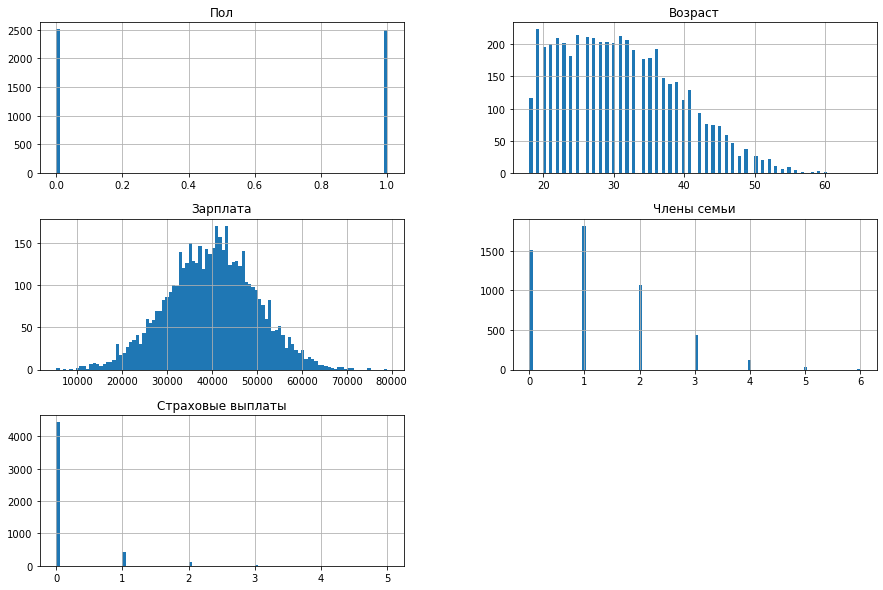


7.Корреляция между столбцами

Посчет корреляции
                        Пол   Возраст  Зарплата  Члены семьи  \
Пол                1.000000  0.002074  0.014910    -0.008991   
Возраст            0.002074  1.000000 -0.019093    -0.006692   
Зарплата           0.014910 -0.019093  1.000000    -0.030296   
Члены семьи       -0.008991 -0.006692 -0.030296     1.000000   
Страховые выплаты  0.010140  0.651030 -0.014963    -0.036290   

                   Страховые выплаты  
Пол                         0.010140  
Возраст                     0.651030  
Зарплата                   -0.014963  
Члены семьи                -0.036290  
Страховые выплаты           1.000000  

Построение графиков


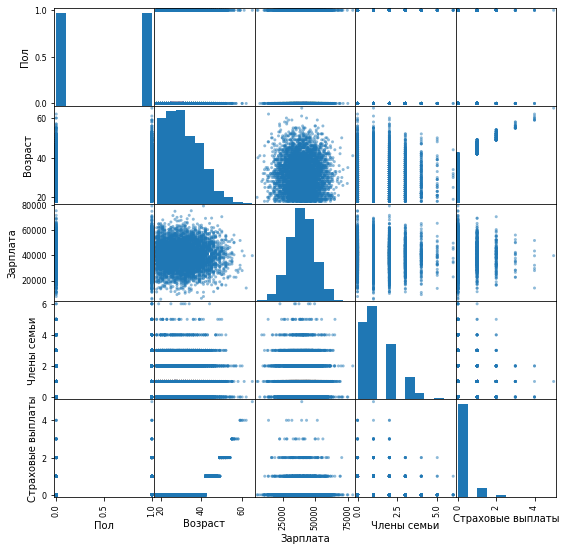

In [6]:
all_info(data)

**Приведем возраст и зарплату к целочисленному типу данных**

In [7]:
data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)

**Избавимся от дупликатов**

In [8]:
data= data.drop_duplicates()

In [9]:
data.shape

(4847, 5)

По представленным данным можно сделать слеждущие выводы:
- в датафрейме 4847 строк и 5 столбцов
- пустые данные отсутсвуют 
- было 153 дупликата. После удаление их стало 0.
- столбец 'Возраст' и 'Зарплата' был переведен в целочисленный тип данных.
- данные вероятно всего искусственные, так как явной закономерности между ними не выявленны. Наблюдается корреляция только между возрастом и колество страховых выплат. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Не изменится.


**Обоснование:** 

Пусть матрица предсказания при умножении на матрицу P примет следующий вид:

$$
X1 = XP
$$

Тогда предсказания примут следующий вид:

$$
a_1 = X1w_1 = XPw_1
$$

Посмотрим как изменистя формула обучения при умножении на обратимую матрицу:

$$
w_1 = (X1^T X1)^{-1} X1^T y = ((XP)^T XP)^{-1} (XP)^T y
$$

Т.к. 
$$
(XP)^T = P^T X^T
$$

А 
$$
(XP)^{-1} = P^{-1}  X^{-1} 
$$


То уравнение w1 преобразуется 

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = (P^T (X^T X)P)^{-1} P^T X^T y = 
$$
$$
 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$

Где

$$
 (P^T)^{-1} P^T = E
$$

- E - единичная матрица

Отсюда следует, что

$$
w_1  = P^{-1} (X^T X)^{-1}  X^T y = P^{-1}w
$$

И подставив полученный результат в уравнение:
$$
a_1 = X1w_1 = XPw_1 = XPP^{-1}w = Xw = a
$$

Получаем, что умножив признаки на обратиму матрицу предсказания не изменяютсятся. Матрица a1 равняется а. Однако вектор весов линейной регрессии будут различаться.

**Вывод:**
В данном пункте было доказано, что при умножении признаков на обратимую матрицу качетсво модели не поменяется, так как предсказания не изменяются. Однако поменяются веса для новых признаков. И следовательно необходиом будет переобучить модель на новых признаках, чтобы проверка в дальнейшем сошлась. 

## Алгоритм преобразования

**Алгоритм**

**1. Создадим функцию формирующую рандомную матрицу размером (n, n) для шифрования данных клиентов**

In [10]:
def rnd_matrix(n):
        random_matrix = np.random.normal(size=(n, n))
        try:
            np.linalg.inv(random_matrix) 
        except LinAlgError: 
        # если возникает ошибка, т.е. обратной матрицы не существует, выполняется еще одна попытка
            rnd_matrix(n)
        return random_matrix

Размер матрицы будет равняться ширине матрицы признаков, чтобы могло выполняться матричное умножение.

**2. Выделим целевой признак и признаки:**

-	Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
-	Целевой признак: количество страховых выплат клиенту за последние 5 лет.


In [11]:
features = data.drop('Страховые выплаты', axis = 1) #наша матрица признаков
target = data['Страховые выплаты']

**3. Выполним масштабирование данных**

In [12]:
#Проведем масштабирование с помощью StandardScaler()
scaler = StandardScaler()
scaler.fit(features)

#Сохраним масштабированные признаки в features_scaled
features_scaler = scaler.transform(features)

4. Создадим рандомную матрицу

In [13]:
P = rnd_matrix(features_scaler.shape[1])

In [14]:
P

array([[ 1.35403424, -0.24850885,  0.95743874, -0.42379495],
       [-0.40569967, -1.52652991, -0.15556235, -1.04197909],
       [-0.62240397, -0.38117813,  0.46853218, -0.24656436],
       [-1.42480177,  1.4450518 , -0.60230756, -0.62596419]])

**Обоснование**

Проверим, что 
$$
a_1 = a
$$

Расcчитаем **a**

$$
a = Xw
$$


In [15]:
X = features_scaler
y = target

Рассчитаем формулу обучения:

$$
w = (X^T X)^{-1} X^T y
$$

In [16]:
# вычислим вектор весов
w = inv(X.T @ X) @ X.T @ y

In [17]:
w

array([ 0.00473007,  0.30692826, -0.00138603, -0.01565625])

In [18]:
a = features_scaler @ w

In [19]:
a

array([ 0.36706966,  0.54004184, -0.05813168, ..., -0.41390424,
       -0.34620098, -0.1018115 ])

In [20]:
#размер матрицы а
a.shape

(4847,)

Расчитаем **a1**

$$
a_1 = X1w_1
$$


Где матрица признаков умноженная на рандомную матрицу

$$
X1 = XP
$$

In [21]:
# шифрование данных
X1 = X @ P

А вектор весов **w1**
$$
w_1 = (X1^T X1)^{-1} X1^T y
$$

In [22]:
# вычислим вектор весов
w1 = inv(X1.T @ X1) @ X1.T @ y

In [23]:
w1

array([ 0.02696906, -0.09753274, -0.12222252, -0.14392777])

In [24]:
a1 = X1 @ w1

In [25]:
a1

array([ 0.36706966,  0.54004184, -0.05813168, ..., -0.41390424,
       -0.34620098, -0.1018115 ])

In [26]:
#размер матрицы а1
a1.shape

(4847,)

Вычтем из матрицы а матрицу а1 и просуммируем все полученные значения, чтоы убедится, что матрицы равны. Результатом должен являться 0 или число стремящееся к нулю.

In [27]:
(a - a1).sum()

-2.5133974762558964e-14

Число получилось очень маленьким и стремящееся к нулю. следовательно матрицы a и а1 практически равные. Почему разность не дала число 0 может скрываться в округлении числе при перемножении матриц

Проверим, что выполненные выше преобразования в доказательсве тоже верны. 
$$
w11  = P^{-1}w
$$

$$
a11 = X1w11
$$

и следовательно 

$$
a = a11
$$

In [28]:
# вычислим вектор весов
w11 = inv(P) @ w

In [29]:
a11 = X1 @ w11

In [30]:
a11

array([ 0.36706966,  0.54004184, -0.05813168, ..., -0.41390424,
       -0.34620098, -0.1018115 ])

In [31]:
a11.shape

(4847,)

In [32]:
(a - a11).sum()

-2.4405390902648705e-14

Число получилось тоже очень маленьким и стремящееся к нулю. следовательно матрицы a и а11 тоже равны. 

**Вывод:**

В данной пункте прописали алгоритм преобразования и проверили на практики, что выведенные формулы в предыдущем пункте дают верный результат. А именно, что умножив признаки на обратиму матрицу предсказания не изменяютсятся. Проверим теперь, что результаты не влияют на метрики.

## Проверка алгоритма

Выполним обучение на модели Линейная регрессия на данных признаках X и посчитаем метрику R2_Score

In [33]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print(r2_score(y,predictions))

0.4302010046633359


Выполним обучение на модели Линейная регрессия на данных признаках X1 и посчитаем метрику R2_Score

In [34]:
model = LinearRegression()
model.fit(X1, y)
predictions_1 = model.predict(X1)
print(r2_score(y,predictions_1))

0.4302010046633359


**Вывод:**

Модели Линейной регресси с данными до шифрования и после обучены. Метрики сошлись. Шифрование не повлияло на обучение моделей.

# **Итоговый вывод**

В проекте необходимо было защитить данные клиентов страховой компании. Был разработан метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Была обоснванна корректность его работы.

Для достижения этих целей было сделано:
1. загрузка необходимых библиотек и исходный датафрейм. В ходе изучения датафлейма некоторые столбцы были преобразованы в необходимый тип данных, а именно: "Возраст" и "Зарплата" в целочисленынй тип данных. Также были удалены дупликаты.
2. Алгебраитечким путем было обосновано, что  умножив признаки на обратиму матрицу предсказания не изменяютсятся. Матрица a1 равняется а. Однако вектор весов линейной регрессии будут различаться.

$$
a_1 = X1w_1 = XPw_1 = XPP^{-1}w = Xw = a
$$

3. Была проведена проверка на числах и доказано, что формула выше верна
4. Обучена модель Линейная регрессия до шифрования и после. Метркиа R2_Score сошлась в обоих случаях. Было показано, что шифрование не влияет на обучение модели.